<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-109.022349,42.774442,686.131946,-643.357504
1,0.0,1.0,68.663703,66.045349,-1641.553748,-1496.844696,305.348553,-1802.193250
2,0.0,2.0,21.071655,68.659935,-691.687274,-591.955684,749.148724,-1341.104408
3,0.0,3.0,43.844790,78.255402,698.959813,831.060005,791.816930,39.243075
4,0.0,4.0,37.606052,48.352160,-1620.493073,-1524.534860,138.835379,-1663.370239
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-3373.178389,-3231.904417,-285.412292,-2946.492125
29996,999.0,26.0,82.498172,54.958596,906.390599,1053.847367,207.467172,846.380195
29997,999.0,27.0,39.545015,80.575288,-2305.272456,-2175.152153,-334.538785,-1840.613368
29998,999.0,28.0,58.576661,46.412209,-420.873237,-305.884367,26.710938,-332.595305


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    61.875713  79.921078  -109.022349    42.774442  686.131946   
      1.0    68.663703  66.045349 -1641.553748 -1496.844696  305.348553   
      2.0    21.071655  68.659935  -691.687274  -591.955684  749.148724   
      3.0    43.844790  78.255402   698.959813   831.060005  791.816930   
      4.0    37.606052  48.352160 -1620.493073 -1524.534860  138.835379   
...                ...        ...          ...          ...         ...   
999.0 25.0   46.884186  84.389786 -3373.178389 -3231.904417 -285.412292   
      26.0   82.498172  54.958596   906.390599  1053.847367  207.467172   
      27.0   39.545015  80.575288 -2305.272456 -2175.152153 -334.538785   
      28.0   58.576661  46.412209  -420.873237  -305.884367   26.710938   
      29.0   32.560819  65.487980 -1696.687265 -1588.638466 -320.469985   

                   e_hat  
rep   index               
0.0   0.0    -643.357504  
      1.0   -1802.193250  
      2.0   -1341.104408  
      3.0      39.243075  
      4.0   -1663.370239  
...                  ...  
999.0 25.0  -2946.492125  
      26.0    846.380195  
      27.0  -1840.613368  
      28.0   -332.595305  
      29.0  -1268.168482  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    61.875713  79.921078  -109.022349    42.774442  686.131946   
      1.0    68.663703  66.045349 -1641.553748 -1496.844696  305.348553   
      2.0    21.071655  68.659935  -691.687274  -591.955684  749.148724   
      3.0    43.844790  78.255402   698.959813   831.060005  791.816930   
      4.0    37.606052  48.352160 -1620.493073 -1524.534860  138.835379   
...                ...        ...          ...          ...         ...   
999.0 25.0   46.884186  84.389786 -3373.178389 -3231.904417 -285.412292   
      26.0   82.498172  54.958596   906.390599  1053.847367  207.467172   
      27.0   39.545015  80.575288 -2305.272456 -2175.152153 -334.538785   
      28.0   58.576661  46.412209  -420.873237  -305.884367   26.710938   
      29.0   32.560819  65.487980 -1696.687265 -1588.638466 -320.469985   

                   e_hat  
rep   index               
0.0   0.0    -643.357504  
      1.0   -1802.193250  
      2.0   -1341.104408  
      3.0      39.243075  
      4.0   -1663.370239  
...                  ...  
999.0 25.0  -2946.492125  
      26.0    846.380195  
      27.0  -1840.613368  
      28.0   -332.595305  
      29.0  -1268.168482  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,61.875713,79.921078,-109.022349,42.774442,686.131946,-643.357504
1,0.0,1.0,68.663703,66.045349,-1641.553748,-1496.844696,305.348553,-1802.193250
2,0.0,2.0,21.071655,68.659935,-691.687274,-591.955684,749.148724,-1341.104408
3,0.0,3.0,43.844790,78.255402,698.959813,831.060005,791.816930,39.243075
4,0.0,4.0,37.606052,48.352160,-1620.493073,-1524.534860,138.835379,-1663.370239
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,46.884186,84.389786,-3373.178389,-3231.904417,-285.412292,-2946.492125
29996,999.0,26.0,82.498172,54.958596,906.390599,1053.847367,207.467172,846.380195
29997,999.0,27.0,39.545015,80.575288,-2305.272456,-2175.152153,-334.538785,-1840.613368
29998,999.0,28.0,58.576661,46.412209,-420.873237,-305.884367,26.710938,-332.595305


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    61.875713  79.921078  -109.022349    42.774442  686.131946   
      1.0    68.663703  66.045349 -1641.553748 -1496.844696  305.348553   
      2.0    21.071655  68.659935  -691.687274  -591.955684  749.148724   
      3.0    43.844790  78.255402   698.959813   831.060005  791.816930   
      4.0    37.606052  48.352160 -1620.493073 -1524.534860  138.835379   
...                ...        ...          ...          ...         ...   
999.0 25.0   46.884186  84.389786 -3373.178389 -3231.904417 -285.412292   
      26.0   82.498172  54.958596   906.390599  1053.847367  207.467172   
      27.0   39.545015  80.575288 -2305.272456 -2175.152153 -334.538785   
      28.0   58.576661  46.412209  -420.873237  -305.884367   26.710938   
      29.0   32.560819  65.487980 -1696.687265 -1588.638466 -320.469985   

                   e_hat  
rep   index               
0.0   0.0    -643.357504  
      1.0   -1802.193250  
      2.0   -1341.104408  
      3.0      39.243075  
      4.0   -1663.370239  
...                  ...  
999.0 25.0  -2946.492125  
      26.0    846.380195  
      27.0  -1840.613368  
      28.0   -332.595305  
      29.0  -1268.168482  

[30000 rows x 6 columns]

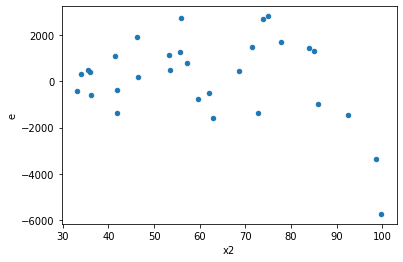

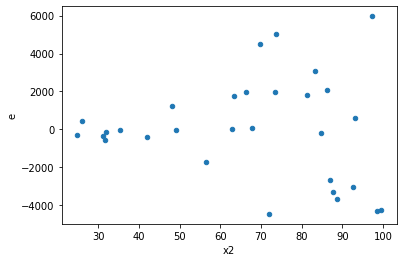

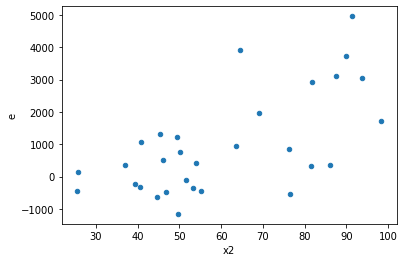

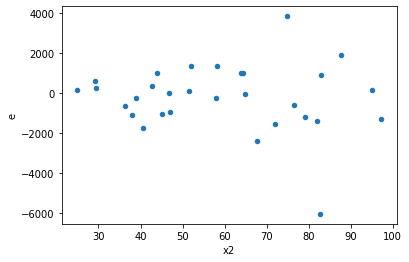

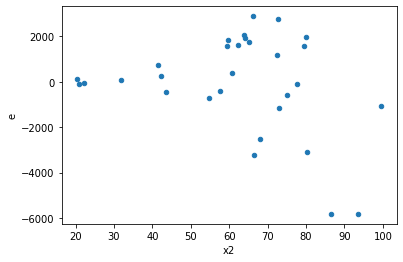

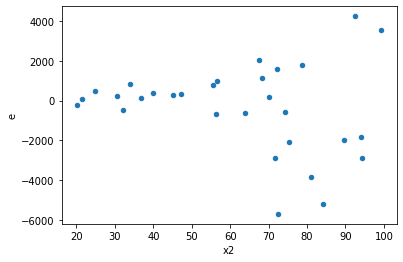

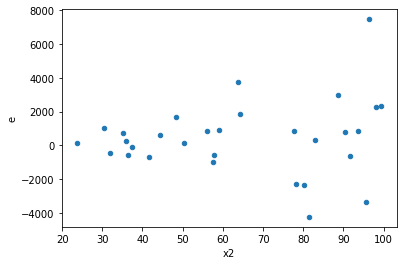

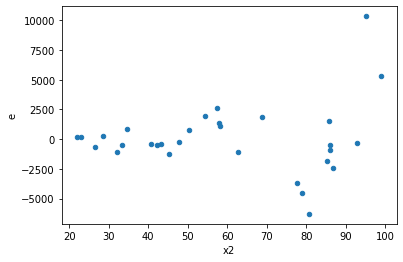

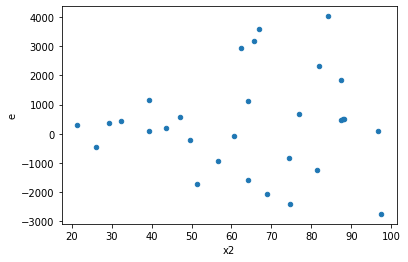

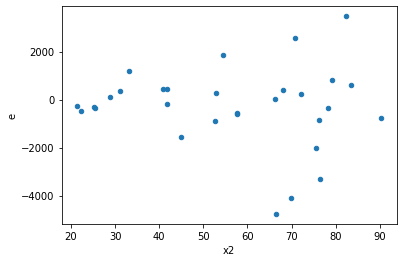

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,16.0,9389956.58977042,16858646.340297244,938995.658977042,1053665.3962685778,1.1221195606127286,0.8077602448272756,0.5961198775863622,0.4038801224136378,Reject005=1 : Homoscedasticity
2.0,17.0,9.0,12267831.219114754,50075673.91711293,721637.1305361621,5563963.768568103,7.71019607102837,0.00376746322617616,0.9981162683869119,0.00188373161308808,Reject005=0 : Heteroscedasticity
3.0,14.0,12.0,14066035.797854396,93910793.05790545,1004716.8427038854,7825899.421492121,7.789159182831182,0.0010323846640081236,0.9994838076679959,0.0005161923320040618,Reject005=0 : Heteroscedasticity
5.0,15.0,11.0,101843717.04119426,90430146.66599314,6789581.136079618,8220922.424181194,1.210814372700471,0.76169440647192,0.61915279676404,0.38084720323596,Reject005=1 : Homoscedasticity
6.0,15.0,11.0,9637406.190460186,76059312.74468,642493.7460306791,6914482.976789091,10.761945963687129,0.0003313526690398305,0.9998343236654801,0.00016567633451991526,Reject005=0 : Heteroscedasticity
7.0,13.0,13.0,55924696.007138826,83981872.01023737,4301899.692856832,6460144.00078749,1.501695637281909,0.47359222595018924,0.7632038870249054,0.23679611297509462,Reject005=1 : Homoscedasticity
10.0,12.0,14.0,11227971.18682294,38775232.193205826,935664.2655685783,2769659.442371845,2.96009962578703,0.05621504966121771,0.9718924751693911,0.028107524830608854,Reject005=1 : Homoscedasticity
11.0,12.0,14.0,39959200.98155614,154540089.52438658,3329933.4151296783,11038577.82317047,3.3149545192153917,0.03575301182328916,0.9821234940883554,0.01787650591164458,Reject005=0 : Heteroscedasticity
13.0,11.0,15.0,15283777.74890577,54536620.79723803,1389434.3408096156,3635774.7198158684,2.6167301419204327,0.08553874409166906,0.9572306279541655,0.04276937204583453,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,16.0,9389956.58977042,16858646.340297244,938995.658977042,1053665.3962685778,1.1221195606127286,0.8077602448272756,Reject005=1 : Homoscedasticity
1.0,12.0,14.0,40488399.73674225,2980945.906935768,3374033.3113951874,212924.70763826914,0.06310687772973504,2.5780418196093715e-05,Reject005=0 : Heteroscedasticity
2.0,17.0,9.0,12267831.219114754,50075673.91711293,721637.1305361621,5563963.768568103,7.71019607102837,0.00376746322617616,Reject005=0 : Heteroscedasticity
3.0,14.0,12.0,14066035.797854396,93910793.05790545,1004716.8427038854,7825899.421492121,7.789159182831182,0.0010323846640081236,Reject005=0 : Heteroscedasticity
4.0,17.0,9.0,60945280.126487754,16461212.518980972,3585016.4780286914,1829023.613220108,0.5101855526828265,0.22192252130203383,Reject005=1 : Homoscedasticity
5.0,15.0,11.0,101843717.04119426,90430146.66599314,6789581.136079618,8220922.424181194,1.210814372700471,0.76169440647192,Reject005=1 : Homoscedasticity
6.0,15.0,11.0,9637406.190460186,76059312.74468,642493.7460306791,6914482.976789091,10.761945963687129,0.0003313526690398305,Reject005=0 : Heteroscedasticity
7.0,13.0,13.0,55924696.007138826,83981872.01023737,4301899.692856832,6460144.00078749,1.501695637281909,0.47359222595018924,Reject005=1 : Homoscedasticity
8.0,8.0,18.0,100800418.49532226,29527832.173776705,12600052.311915282,1640435.1207653724,0.1301927230265615,0.006210903999015312,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    597
Reject005=1 : Homoscedasticity      403
Name: Result_test, dtype: int64